In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from lightgbm import LGBMRegressor
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [45]:
X = pd.read_csv("./data/X.csv")
y = pd.read_csv("./data/updrs_3.csv")

In [46]:
X

,visit_month,VTLTC(UniMod_4)VAPLSGVDFQLR,LVPPMEEDYPQFGSPK,IVQIYKDLLR,DPTFIPAPIQAK,VDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSK,MELERPGGNEITR,FVEGLPINDFSR,LSYEGEVTK,NVVYTC(UniMod_4)NEGYSLIGNPVAR,...,WYFDVTEGK,VTTVASHTSDSDVPSGVTEVVVK,VSEADSSNADWVTK,DLLFKDSAHGFLK,IDQNVEELKGR,LNMHMNVQNGKWDSDPSGTK,LLIYGATSR,C(UniMod_4)DSSPDSAEDVRK,FTNIGPDTMR,TPC(UniMod_4)QQELDQVLER
0,0,66733.6,48538.9,18412.7,325428.0,0.0,109732.0,0.0,186738.0,9353.27,...,30318.9,1579800.0,45665.3,107627.0,13730.7,4993.600,196510.0,0.00,127868.0,57445.0
1,12,97854.4,49265.1,24783.7,255971.0,111693.0,160483.0,25951.8,182866.0,9805.91,...,60135.0,1616750.0,56554.6,127488.0,0.0,9039.020,185831.0,0.00,150790.0,44282.9
2,18,89718.0,0.0,27202.5,366939.0,119913.0,143219.0,31503.1,193580.0,11447.40,...,0.0,1631220.0,47355.4,174750.0,21281.1,6535.320,89982.2,9155.27,157041.0,69195.9
3,12,49913.8,57828.5,40149.8,475417.0,159633.0,308855.0,26090.8,229457.0,6809.87,...,84101.6,1829510.0,67664.1,190614.0,33286.0,10642.300,164879.0,14876.50,170791.0,38158.7
4,24,51890.0,60602.8,36625.8,504302.0,74972.9,129009.0,25464.6,120733.0,10790.90,...,76436.4,2675500.0,43980.6,179707.0,16066.3,5354.970,229282.0,9463.37,127225.0,55003.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,24,119479.0,65540.4,28099.0,279244.0,214749.0,325202.0,19784.8,117376.0,0.00,...,79656.4,2049040.0,66809.1,224997.0,24586.9,13700.800,229903.0,4296.41,146986.0,33866.5
1064,12,0.0,52958.3,20384.2,365474.0,11248.4,97814.2,14766.2,176291.0,8700.97,...,64702.0,1623120.0,33056.6,129355.0,20510.6,792.162,217998.0,7500.27,107819.0,41968.2
1065,24,107932.0,48682.2,23765.7,291377.0,40847.6,118337.0,15701.2,169076.0,5672.64,...,57824.2,1607100.0,55247.1,182754.0,25663.2,4566.990,162223.0,11436.00,101512.0,38995.8
1066,48,101860.0,59452.0,27504.0,296040.0,185513.0,115663.0,12071.2,182382.0,4938.09,...,45569.1,2039800.0,52164.8,196890.0,18511.3,5014.990,258267.0,12496.70,94961.3,44944.5


In [47]:
y

,updrs_3
0,13.0
1,8.0
2,0.0
3,31.0
4,19.0
...,...
1063,13.0
1064,25.0
1065,23.0
1066,35.0


In [48]:
def smape_plus_1(y_true, y_pred):
    y_true_plus_1 = y_true + 1
    y_pred_plus_1 = y_pred + 1

    y_pred_plus_1 = y_pred_plus_1.flatten()
    y_true_plus_1 = np.array(y_true_plus_1.values).flatten()
    metric = np.zeros(len(y_true_plus_1))
    
    numerator = np.abs(y_true_plus_1 - y_pred_plus_1)
    denominator = ((np.abs(y_true_plus_1) + np.abs(y_pred_plus_1)) / 2)
    
    mask_not_zeros = (y_true_plus_1 != 0) | (y_pred_plus_1 != 0)
    metric[mask_not_zeros] = numerator[mask_not_zeros] / denominator[mask_not_zeros]
    
    return 100 * np.nanmean(metric)

In [49]:
def evaluate_model(model_df, i, model_name, model, X, y, X_test, y_test):
    """
    this function is for regression takes the model with the data and calculate
    the scores, with cross validation techniques, in addition to MAE, MSE, RMSE, MAPE
    R Squared and Adjusted R Squared

    :param model: model
    :param X_train, X_test, y_train, y_test: data that was used
    """

    # cross validation with 5 folds
    all_cv_5 = cross_val_score(model, X, y, cv=5, scoring=smape_plus_1)
    print("all CV 5: {}".format(all_cv_5))
    # print("Mean Cross-Validation score: {}".format(all_cv_5.mean()))

    # predictions from our model
    predictions = model.predict(X_test)


    # calculating R squared and Adjusted R squared
    r_sqre = r2_score(y_test, predictions)
    n = len(y_test)
    p = X_test.shape[1] # number of independant features

    Adj_r2 = 1 - ((1 - r_sqre) * (n - 1) / (n - 1 - p))
    
    test_mae = mean_absolute_error(y_test, predictions)

    test_mse = mean_squared_error(y_test, predictions)
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions))

    smape_ = smape_plus_1(y_test, predictions)

    
    model_df.loc[i] = [model_name, all_cv_5.mean(),
                    test_mae, mean_absolute_percentage_error(y_test, predictions),
                   test_mse, test_rmse, r_sqre, Adj_r2, smape_]

    return model_df

In [50]:
def train_and_evalute(X, y, metric):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

    print("Shape of X_train: {} \t Shape of y_train: {}".format(X_train.shape, y_train.shape))
    print("Shape of X_test: {} \t Shape of y_test: {}".format(X_test.shape, y_test.shape))

    # Building pipelins of standard scaler and model for varios regressors.

    lr = LinearRegression()

    lasso = Lasso()


    xgb = XGBRegressor()

    gbr = GradientBoostingRegressor()

    eln = ElasticNet()

    br = BayesianRidge()

    cat = CatBoostRegressor(allow_writing_files=False, verbose=0, task_type="GPU")

    lgbm = LGBMRegressor()


    # List of all the pipelines
    pipelines = [lr, lasso, xgb, gbr,
                eln, br, cat, lgbm] # 

    # Dictionary of pipelines and model types for ease of reference
    ml_dict = {0: "LinearRegression", 1: "Lasso", 2: "XGBRegressor", 3: "GradientBoostingRegressor",
                    4: "Elastic Net", 5:"BayesianRidge", 6: "CatBoostRegressor", 7: "LGBMRegressor"}
        #, 

    models_scores_df = pd.DataFrame(columns=["model", "Mean CV", "MAE",
                                            "MAPE", "MSE", "RMSE", "R_Squared", "Adjusted_R_Squared", "SMAPE"])


    # Fit the pipelines and display the scores with Cross validation
    for i, pipe in enumerate(pipelines):
        # getting the name of our model
        model_name = ml_dict[i]
        print(model_name)
        
        # fitting our data
        pipe.fit(X_train, y_train)
        
        evaluate_model(models_scores_df, i, model_name, pipe, X, y, X_test, y_test)


    # selecting top 3 score based on metric
    filtered_models_scores_df =  models_scores_df.sort_values(metric)

    return filtered_models_scores_df

In [51]:
models_scores_df = train_and_evalute(X, y, metric="SMAPE")

Shape of X_train: (854, 944) 	 Shape of y_train: (854, 1)
Shape of X_test: (214, 944) 	 Shape of y_test: (214, 1)
LinearRegression
all CV 5: [nan nan nan nan nan]
Lasso
all CV 5: [nan nan nan nan nan]
XGBRegressor
all CV 5: [nan nan nan nan nan]
GradientBoostingRegressor
all CV 5: [nan nan nan nan nan]
Elastic Net
all CV 5: [nan nan nan nan nan]
BayesianRidge
all CV 5: [nan nan nan nan nan]
CatBoostRegressor
all CV 5: [nan nan nan nan nan]
LGBMRegressor
all CV 5: [nan nan nan nan nan]


In [52]:
models_scores_df

,model,Mean CV,MAE,MAPE,MSE,RMSE,R_Squared,Adjusted_R_Squared,SMAPE
6,CatBoostRegressor,NaN,9.988387,1.347639e+16,157.124134,12.534917,0.337840,1.192941,78.093051
3,GradientBoostingRegressor,NaN,10.518220,1.415263e+16,177.785234,13.333613,0.250769,1.218312,79.414109
7,LGBMRegressor,NaN,10.402184,1.347693e+16,169.555603,13.021352,0.285450,1.208207,79.753514
5,BayesianRidge,NaN,10.415671,1.357587e+16,173.302836,13.164453,0.269658,1.212808,80.326657
2,XGBRegressor,NaN,11.136482,1.400769e+16,193.840813,13.922673,0.183106,1.238028,82.523558
4,Elastic Net,NaN,11.387279,1.550590e+16,198.748515,14.097820,0.162424,1.244054,83.446214
1,Lasso,NaN,11.976409,1.648693e+16,216.431398,14.711608,0.087904,1.265768,85.111305
0,LinearRegression,NaN,27.225359,2.371891e+16,1395.381436,37.354805,-4.880486,2.713466,129.303079


In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [55]:
import tensorflow as tf

In [56]:
class Custom_CE_Loss(tf.keras.losses.Loss):
    def __init__(self):
        super().__init__()
    def call(self, y_true, y_pred):        
        y_pred = tf.reshape(y_pred, [-1]) # flatten y_pred
        y_true = tf.reshape(y_true, [-1]) # flatten y_true
        
        num = tf.abs(y_true - y_pred)
        dem = ((tf.abs(y_true) + tf.abs(y_pred)) / 2)
        
        pos_ind = tf.math.logical_or(y_true != 0, y_pred != 0)
        smap = tf.where(pos_ind, num / dem, tf.zeros_like(num))
        
        return 100 * tf.reduce_mean(smap)

In [57]:

model = tf.keras.Sequential([

tf.keras.layers.Dense(256, input_shape=[X.shape[1]]),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(128),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(64),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(32),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(8),
tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=Custom_CE_Loss())

In [58]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=2)

Epoch 1/300
27/27 - 0s - loss: 155.2053 - val_loss: 152.5482
Epoch 2/300
27/27 - 0s - loss: 146.9317 - val_loss: 152.4011
Epoch 3/300
27/27 - 0s - loss: 143.8513 - val_loss: 150.6691
Epoch 4/300
27/27 - 0s - loss: 144.4857 - val_loss: 151.5881
Epoch 5/300
27/27 - 0s - loss: 138.5779 - val_loss: 145.4252
Epoch 6/300
27/27 - 0s - loss: 141.8406 - val_loss: 149.6348
Epoch 7/300
27/27 - 0s - loss: 139.8277 - val_loss: 144.1494
Epoch 8/300
27/27 - 0s - loss: 137.5902 - val_loss: 154.3392
Epoch 9/300
27/27 - 0s - loss: 134.4067 - val_loss: 144.3001
Epoch 10/300
27/27 - 0s - loss: 133.3080 - val_loss: 154.3119
Epoch 11/300
27/27 - 0s - loss: 139.9312 - val_loss: 149.0376
Epoch 12/300
27/27 - 0s - loss: 140.1456 - val_loss: 152.4901
Epoch 13/300
27/27 - 0s - loss: 137.5461 - val_loss: 146.6612
Epoch 14/300
27/27 - 0s - loss: 135.2320 - val_loss: 147.6844
Epoch 15/300
27/27 - 0s - loss: 132.1045 - val_loss: 141.5767
Epoch 16/300
27/27 - 0s - loss: 128.2564 - val_loss: 143.2358
Epoch 17/300
27/2

In [59]:
def plot_learning_curve(model_history):
    """
    plotting the leanring curve of the model
    """
    
    plt.figure(figsize=(12, 8))
    plt.title('Learning Curves')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(model_history.history['loss'], label='train')
    plt.plot(model_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.show()

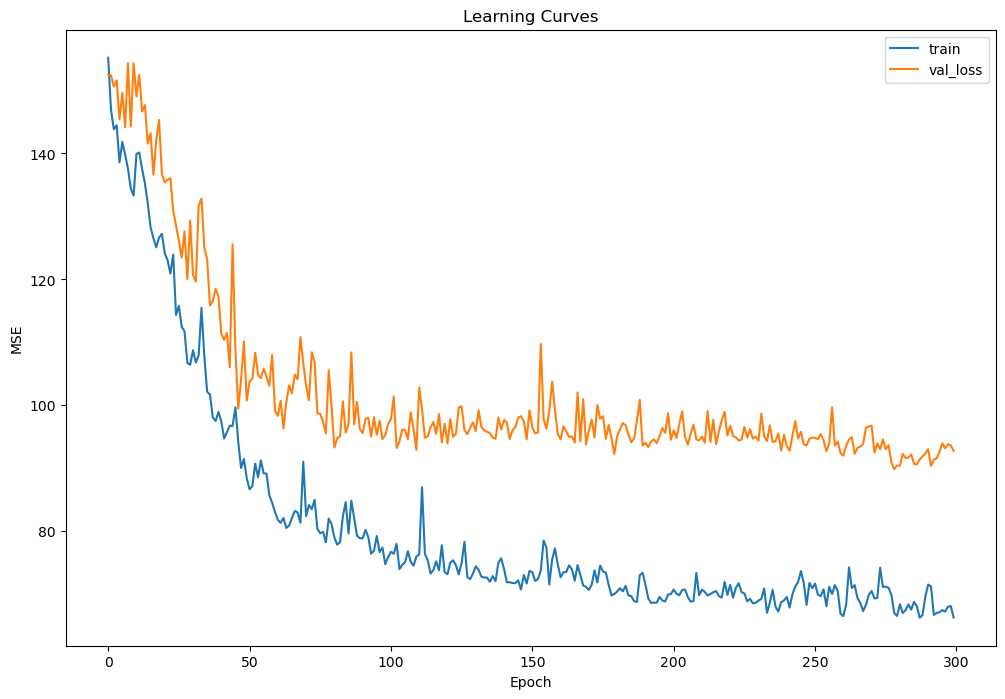

In [60]:
plot_learning_curve(history)

In [61]:
predictions = model.predict(X_test)

# Metrics
print("MAE: {}".format(mean_absolute_error(y_test, predictions)))
print("MSE: {}".format(mean_squared_error(y_test, predictions)))
print("RMSE: {}".format(mean_squared_error(y_test, predictions, squared=False)))
print("MAPE: {}".format(mean_absolute_percentage_error(y_test, predictions)))
print("R2: {}".format(r2_score(y_test, predictions)))
print("SMAPE: {}".format(smape_plus_1(y_test, predictions)))

MAE: 10.557615016145217
MSE: 184.52406549907644
RMSE: 13.583963541583747
MAPE: 1.3843429207290736e+16
R2: 0.22236942559404893
SMAPE: 80.05787288103825
